# **MÓDULO 39 - Exercicio - Aplicando SVM**

Nessa atividade vocês usarão uma base já connhecida, a base de propensão a compra de carros. A mesma que também usamos na tarefa de XGboost!


In [1]:
from sklearn.svm import SVC
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 1. Carrega a base de dados, verifique os tipos de dados, dados faltantes e drop a coluna ID.


In [2]:
base = pd.read_csv("CARRO_CLIENTES.csv", delimiter=',')

In [3]:
base

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
...,...,...,...,...,...
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1


In [4]:
base.dtypes

User ID          int64
Gender          object
Age              int64
AnnualSalary     int64
Purchased        int64
dtype: object

In [5]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [6]:
base.isnull().mean() * 100

User ID         0.0
Gender          0.0
Age             0.0
AnnualSalary    0.0
Purchased       0.0
dtype: float64

In [7]:
base = base.drop(columns=['User ID'])

In [8]:
base

,Gender,Age,AnnualSalary,Purchased
0,Male,35,20000,0
1,Male,40,43500,0
2,Male,49,74000,0
3,Male,40,107500,1
4,Male,25,79000,0
...,...,...,...,...
995,Male,38,59000,0
996,Female,47,23500,0
997,Female,28,138500,1
998,Female,48,134000,1


# 2. Aplique o Label Encoder para a coluna Gender e exclua a coluna categórica.

In [ ]:
# Criando o codificador
label_encoder = LabelEncoder()

# Ajustando e transformando a coluna
base['Gender'] = label_encoder.fit_transform(base['Gender'])

In [10]:
base

,Gender,Age,AnnualSalary,Purchased
0,1,35,20000,0
1,1,40,43500,0
2,1,49,74000,0
3,1,40,107500,1
4,1,25,79000,0
...,...,...,...,...
995,1,38,59000,0
996,0,47,23500,0
997,0,28,138500,1
998,0,48,134000,1


# 3. Faça a matriz de correlação e analise as váriaveis que parecem ter maior correlação com a váriavel target.

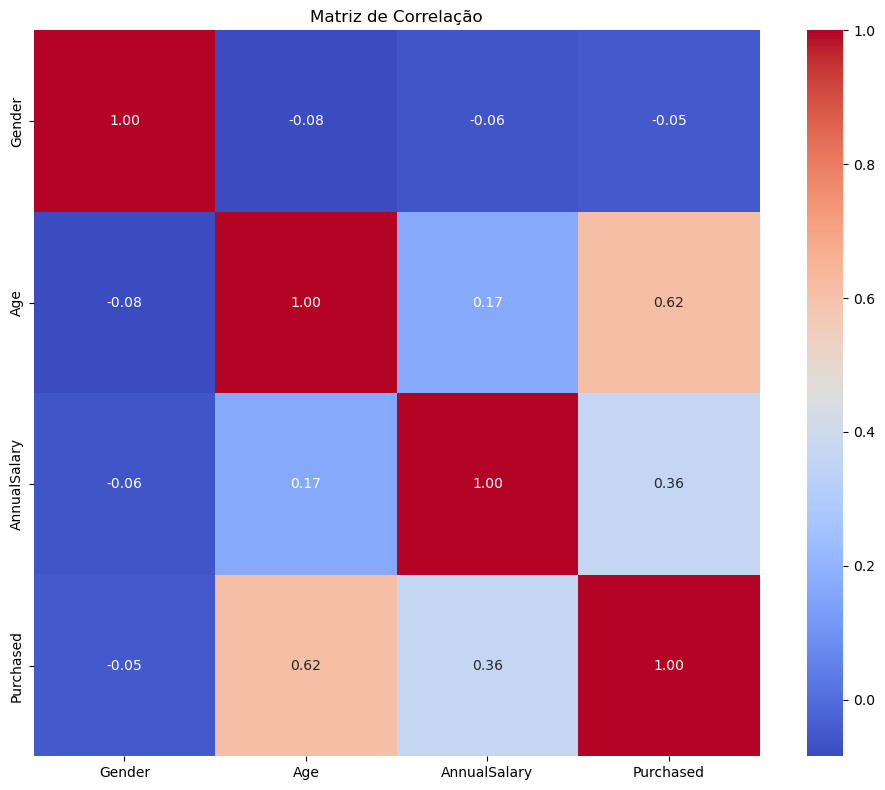

In [11]:
# Matriz de correlação
correlation_matrix = base.corr(numeric_only=True)

# Plot do heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de Correlação")
plt.tight_layout()
plt.show()

# 4. Faça a separação da base em X e Y e em seguida nas bases de treino e teste.

In [12]:
X = base.drop('Purchased', axis=1)  # X contém todas as colunas exceto 'Purchased'
Y = base['Purchased']  # Y contém apenas a coluna 'Purchased'

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

**Todos passos até aqui vocês realizaram na tarefa anterior também!**

# 5. Treino o modelo SVM com sua base de treino.
Esse modelo deve ser treinado usando o kernel linear.

In [14]:
svm_model = SVC(kernel =  'linear', random_state = 1, C = 1.0)
svm_model.fit(X_train,Y_train)

SVC(kernel='linear', random_state=1)

# 6. Realize as previsões para a base de teste e traga a avaliação.

In [15]:
Y_pred = svm_model.predict(X_train)
Y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,

In [16]:
report = classification_report(Y_train, Y_pred)
print("Relatório de Classificação:\n", report)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87       486
           1       0.80      0.78      0.79       314

    accuracy                           0.84       800
   macro avg       0.83      0.83      0.83       800
weighted avg       0.84      0.84      0.84       800



###  O modelo demonstrou uma boa acurácia em geral 84%, com desempenho um pouco melhor para a classe 0 (F1 = 87%) em comparação à classe 1 (F1 = 79% ).O recall da classe 1 está um pouco mais baixo 78%, ou seja o modelo erra alguns casos positivos. Apesar de que no geral, há espaço para ajuste de hiperparâmetros melhorar a perfomance do modelo para a classe 1.

# 7. Treine um novo modelo SVM com sua base de treino + realize as previsões e avalições.
Esse modelo dedve ser treinado usando o kernel poly.

In [17]:
svm_model_poly = SVC(kernel =  'poly', random_state = 1, C = 1.0)
svm_model_poly.fit(X_train,Y_train)

SVC(kernel='poly', random_state=1)

In [18]:
Y_pred_poly = svm_model_poly.predict(X_train)
Y_pred_poly

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,

In [19]:
report = classification_report(Y_train, Y_pred_poly)
print("Relatório de Classificação:\n", report)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.73      0.95      0.82       486
           1       0.86      0.44      0.58       314

    accuracy                           0.75       800
   macro avg       0.79      0.70      0.70       800
weighted avg       0.78      0.75      0.73       800



### O modelo bateu uma acurácia de 75%, mas esta com um forte viés para a classe 0 (recall = 95%) e baixo desempenho na classe 1 (recall = 44%).Mesmo que a precisão da classe 1 seja alta (86%), esse modelo esta falhando em identificar muitos casos positivos, o que prejudica o modelo de forma geral, isso já demonstra o mesmo problema visto em aula: muito provavelmente essa base pode ser separada linearmente, e aplicar uma técnica mais complexa causa perda de desempenho, pois o modelo deixa de generalizar bem e passa a se ajustar demais aos padrões específicos do conjunto de treino (overfitting).

# 8. Qual modelo se saiu melhor? O SVM com kernel linear ou poly? Compare também com o XGboost, da atividade anterior, você obteve melhores previsões com qual dos modelos?

| Modelo                  | Accuracy | Precision (Classe 1) | Recall (Classe 1) | F1-Score (Classe 1) | Ranking |
|-------------------------|----------|----------------------|-------------------|---------------------|---------|
| XGBoost                 | 0.92     | 0.95                  | 0.86              | 0.90                 | 1️⃣      |
| SVM (kernel linear)     | 0.84     | 0.80                  | 0.78              | 0.79                 | 2️⃣      |
| SVM (kernel polinomial) | 0.75     | 0.86                  | 0.44              | 0.58                 | 3️⃣      |


### Quando colocamos os dados lado a lado, fica claro quais modelos se saíram melhor. Nesse nosso caso, o XGBoost foi o "ganhador", seguido pelo SVM com kernel linear e o último o SVM com kernel polinomial.